# Tablite

<table><tr>
    <td> <img src="https://app.travis-ci.com/root-11/tablite.svg?branch=master" alt="Build Status" style="width: 100px;"/> </td>
    <td></td>
        <td> <img src="https://codecov.io/gh/root-11/tablite/branch/master/graph/badge.svg" alt="Code coverage" style="width: 100px;"/> </td>
    <td></td>
        <td> <img src="https://pepy.tech/badge/tablite" alt="Downloads" style="width: 100px;"/> </td>
    <td></td>
        <td> <img src="https://pepy.tech/badge/tablite/month" alt="Downloads / month" style="width: 100px;"/> </td>
    <td></td>
</tr></table>


## Latest updates

| Version    | Change                                                                                                                                          |
|:-----------|:------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022.7.3 | table.to_json now takes kwargs: `row_count`, `columns`, `slice_`, `start_on` |
| 2022.7.2 | documentation update. |
| 2022.7.1 | bugfix. |
| 2022.7.0 | BREAKING CHANGES<br>- Tablite now uses HDF5 as backend. <br>- Has multiprocessing enabled by default. <br>- Is 20x faster. <br>- Completely new API. |



# Introduction

We're all tired of reinventing the wheel when we need to process a bit of data.

- Pandas has a huge memory overhead when the datatypes are messy (hint: They are!).
- Numpy has become a language of it's own. It just doesn't seem pythonic anymore.
- Arrows [isn't ready](https://arrow.apache.org/docs/python/dataset.html).
- SQLite is great but just too slow, particularly on disk.
- Protobuffer is just overkill for storing data when I still need to implement all the analytics after that.

So what do we do? We write a custom built class for the problem at hand and
discover that we've just spent 3 hours doing something that should have taken
20 minutes. No more please!

### Enter: [Tablite](https://pypi.org/project/tablite/)
A python library for tables that does everything you need in 200kB.

Install: `pip install tablite`

Usage:  `>>> from tablite import Table`


### Overview

- Tablite handles all Python datatypes: `str`, `float`, `bool`, `int`, `date`, `datetime`, `time`, `timedelta` and `None`.
- you can select:
  - all rows in a column as `table['A']`
  - rows across all columns as `table[4:8]`
  - or a slice as `table['A', 'B', slice(4,8) ]`.
- you to update with `table['A'][2] = new value`
- you can store or send data using json, by:
  - dumping to json: `json_str = table.to_json()`, or
  - you can load it with `Table.from_json(json_str)`.
- you can iterate over rows using `for row in Table.rows`.
- you can ask `column_xyz in Table.colums` ?
- load from files with `new_table = Table.import_file('this.csv')` which has automatic datatype detection
- perform inner, outer & left sql join between tables as simple as `table_1.inner_join(table2, keys=['A', 'B'])`
- summarise using `table.groupby( ... )`
- create pivot tables using `groupby.pivot( ... )`
- perform multi-criteria lookup in tables using `table1.lookup(table2, criteria=.....`



A quick check before we start:

In [1]:
from tablite.version import major,minor
assert major >= 2022 and minor >=6
from tablite import Table
Table.reset_storage()


### Examples

Here are some examples:

In [2]:
from tablite import Table

# there are three ways to create tables:
t = Table()
t['A'] = [1,2,3]
t['B'] = ['a','b','c']
t.show()


+===+===+===+
| # | A | B |
|row|int|str|
+---+---+---+
|0  |  1|a  |
|1  |  2|b  |
|2  |  3|c  |
+===+===+===+


In [3]:
# all columns at once (slower)
t2 = Table()
t2.add_columns('A','B')
t2.add_rows((1,'a'),(2,'b'),(3,'c'))
assert t==t2

In [4]:
# or load data:
t3 = Table.import_file('tests/data/book1.csv', import_as='csv', columns=None)

# to view any table use .show(). Note that show gives either first and last 7 rows or the whole table if it is less than 20 rows.
t3.show()

100%|██████████| 1/1 [00:00<00:00,  2.03tasks/s]


+===+===+===============+===============+===============+===============+================+
| # | a |       b       |       c       |       d       |       e       |       f        |
|row|int|     float     |     float     |     float     |     float     |     float      |
+---+---+---------------+---------------+---------------+---------------+----------------+
|0  |  1|    0.060606061|    0.090909091|    0.121212121|    0.151515152|     0.181818182|
|1  |  2|    0.121212121|    0.242424242|    0.484848485|     0.96969697|     1.939393939|
|2  |  3|    0.242424242|    0.484848485|     0.96969697|    1.939393939|     3.878787879|
|3  |  4|    0.484848485|     0.96969697|    1.939393939|    3.878787879|     7.757575758|
|4  |  5|     0.96969697|    1.939393939|    3.878787879|    7.757575758|     15.51515152|
|5  |  6|    1.939393939|    3.878787879|    7.757575758|    15.51515152|     31.03030303|
|6  |  7|    3.878787879|    7.757575758|    15.51515152|    31.03030303|     62.06060606|

In [5]:
# should you however want to select the headers instead of importing everything
# (which maybe timeconsuming), simply use get_headers(path)
from tablite import get_headers
from pathlib import Path
path = Path('tests/data/book1.csv')
sample = get_headers(path)
print(f"sample is of type {type(sample)} and has the following entries:")
for k,v in sample.items():
    print(k)
    if isinstance(v,list):
        for r in sample[k]:
            print("\t", r)

sample is of type <class 'dict'> and has the following entries:
delimiter
book1.csv
	 ['a', 'b', 'c', 'd', 'e', 'f']
	 ['1', '0.060606061', '0.090909091', '0.121212121', '0.151515152', '0.181818182']
	 ['2', '0.121212121', '0.242424242', '0.484848485', '0.96969697', '1.939393939']
	 ['3', '0.242424242', '0.484848485', '0.96969697', '1.939393939', '3.878787879']
	 ['4', '0.484848485', '0.96969697', '1.939393939', '3.878787879', '7.757575758']
	 ['5', '0.96969697', '1.939393939', '3.878787879', '7.757575758', '15.51515152']
	 ['6', '1.939393939', '3.878787879', '7.757575758', '15.51515152', '31.03030303']
	 ['7', '3.878787879', '7.757575758', '15.51515152', '31.03030303', '62.06060606']
	 ['8', '7.757575758', '15.51515152', '31.03030303', '62.06060606', '124.1212121']
	 ['9', '15.51515152', '31.03030303', '62.06060606', '124.1212121', '248.2424242']
	 ['10', '31.03030303', '62.06060606', '124.1212121', '248.2424242', '496.4848485']
	 ['11', '62.06060606', '124.1212121', '248.2424242', '4

In [6]:
# to extend a table by adding columns, use t[new] = [new values]
t['C'] = [4,5,6]
# but make sure the column has the same length as the rest of the table!
t.show()

+===+===+===+===+
| # | A | B | C |
|row|int|str|int|
+---+---+---+---+
|0  |  1|a  |  4|
|1  |  2|b  |  5|
|2  |  3|c  |  6|
+===+===+===+===+


In [7]:
# should you want to mix datatypes, tablite will not complain:
from datetime import datetime, date,time,timedelta
import numpy as np
# What you put in ...
t4 = Table()
t4['mixed'] = [
    -1,0,1,  # regular integers
    -12345678909876543211234567890987654321,  # very very large integer
    None,np.nan,  # null values 
    "one", "",  # strings
    True,False,  # booleans
    float('inf'), 0.01,  # floats
    date(2000,1,1),   # date
    datetime(2002,2,3,23,0,4,6660),  # datetime
    time(12,12,12),  # time
    timedelta(days=3, seconds=5678)  # timedelta
]
# ... is exactly what you get out:
t4.show()

+===+=======================================+
| # |                 mixed                 |
|row|                 mixed                 |
+---+---------------------------------------+
|0  |                                     -1|
|1  |                                      0|
|2  |                                      1|
|3  |-12345678909876543211234567890987654321|
|4  |None                                   |
|5  |                                    nan|
|6  |one                                    |
|7  |                                       |
|8  |                                   True|
|9  |                                   True|
|10 |                                    inf|
|11 |                                   0.01|
|12 |                             2000-01-01|
|13 |             2002-02-03 23:00:04.006660|
|14 |                               12:12:12|
|15 |                        3 days, 1:34:38|
+===+=======================================+


In [8]:
# also if you claim the values back as a python list:
for item in list(t4['mixed']):
    print(item)

-1
0
1
-12345678909876543211234567890987654321
None
nan
one

True
True
inf
0.01
2000-01-01
2002-02-03 23:00:04.006660
12:12:12
3 days, 1:34:38


The column itself only tells us the number of entries:


In [9]:
print(t4['mixed'])

<Column>(16 values | key=38)


In [10]:
# to view the datatypes in a column, use Column.types()
type_dict = t4['mixed'].types()
for k,v in type_dict.items():
    print(k,v)

<class 'NoneType'> 1
<class 'bool'> 2
<class 'int'> 4
<class 'float'> 3
<class 'str'> 2
<class 'datetime.datetime'> 1
<class 'datetime.date'> 1
<class 'datetime.time'> 1
<class 'datetime.timedelta'> 1


In [11]:
# you may notice that all datatypes in t3 where identified as floats. 
# This is because tablite guesses the most probable datatype using the
# .guess function on each column
from tablite.datatypes import DataTypes
t3['a'] = DataTypes.guess(t3['a'])
# You can also convert the datatype using a list comprehension
t3['b'] = [float(v) for v in t3['b']]
t3.show()

+===+===+===============+===============+===============+===============+================+
| # | a |       b       |       c       |       d       |       e       |       f        |
|row|int|     float     |     float     |     float     |     float     |     float      |
+---+---+---------------+---------------+---------------+---------------+----------------+
|0  |  1|    0.060606061|    0.090909091|    0.121212121|    0.151515152|     0.181818182|
|1  |  2|    0.121212121|    0.242424242|    0.484848485|     0.96969697|     1.939393939|
|2  |  3|    0.242424242|    0.484848485|     0.96969697|    1.939393939|     3.878787879|
|3  |  4|    0.484848485|     0.96969697|    1.939393939|    3.878787879|     7.757575758|
|4  |  5|     0.96969697|    1.939393939|    3.878787879|    7.757575758|     15.51515152|
|5  |  6|    1.939393939|    3.878787879|    7.757575758|    15.51515152|     31.03030303|
|6  |  7|    3.878787879|    7.757575758|    15.51515152|    31.03030303|     62.06060606|

# API Examples

In the following sections, example are given of the Tablite API's power features:

- Iteration
- Append
- Sort
- Filter
- Index
- Search All 
- Search Any
- Lookup
- Join inner, outer, 
- GroupBy
- Pivot table


# ITERATION!

**_Iteration_** supports for loops and list comprehension at the speed of light:

Just use `[r for r in table.rows]`, or:

    for row in table.rows:
        row ...

Here's a more practical use case:

(1) Imagine a table with columns a,b,c,d,e (all integers) like this:

In [12]:
t = Table()
for column_name in 'abcde':
    t[column_name] =[i for i in range(5)]

(2) we want to add two new columns using the functions:

In [13]:
def f1(a,b,c):
    return a+b+c+1
def f2(b,c,d):
    return b*c*d

(3) and we want to compute two new columns `f` and `g`:

In [14]:
t.add_columns('f', 'g')

(4) we can now use the filter, to iterate over the table, and add the values to the two new columns:

In [15]:
for row in t['a', 'b', 'c', 'd'].rows:
    a, b, c, d = row

    t['f'].append(f1(a, b, c))
    t['g'].append(f2(b, c, d))

assert len(t) == 5
assert list(t.columns) == list('abcdefg')
t.show()

+===+===+===+===+===+===+===+===+
| # | a | b | c | d | e | f | g |
|row|int|int|int|int|int|int|int|
+---+---+---+---+---+---+---+---+
|0  |  0|  0|  0|  0|  0|  1|  0|
|1  |  1|  1|  1|  1|  1|  4|  1|
|2  |  2|  2|  2|  2|  2|  7|  8|
|3  |  3|  3|  3|  3|  3| 10| 27|
|4  |  4|  4|  4|  4|  4| 13| 64|
+===+===+===+===+===+===+===+===+


### Create Index / Indices


**_Index_** supports multi-key indexing using args: `table.index('B','C')`.

This gives you a dictionary with the key as a tuple and the indices as a set, e.g.

    indices = {
        (1, 44): {2,3,33,35}
        (2, 44): {4,5,32}
    }

You can now fetch all rows using index access methods.

Here's the index from `table7`:

### search using ALL and ANY

**_All_** allows copy of a table where "all" criteria match.

This allows you to use custom functions like this:

# APPEND

In [16]:
# to append one table to another, use + or += 
print('length before:', len(t3))  # length before: 45
t5 = t3 + t3  
print('length after +', len(t5))  # length after + 90
t5 += t3 
print('length after +=', len(t5))  # length after += 135
# if you need a lot of numbers for a test, you can repeat a table using * and *=
t5 *= 1_000
print('length after +=', len(t5))  # length after += 135000

length before: 45
length after + 90
length after += 135
length after += 135000


In [17]:
# if your are in doubt whether your tables will be the same you can use .stack(other)
assert t.columns != t2.columns  # compares list of column names.
t6 = t.stack(t2)
t6.show()


+===+=====+=====+=====+=====+=====+=====+=====+=====+=====+
| # |  a  |  b  |  c  |  d  |  e  |  f  |  g  |  A  |  B  |
|row|mixed|mixed|mixed|mixed|mixed|mixed|mixed|mixed|mixed|
+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|0  |    0|    0|    0|    0|    0|    1|    0|None |None |
|1  |    1|    1|    1|    1|    1|    4|    1|None |None |
|2  |    2|    2|    2|    2|    2|    7|    8|None |None |
|3  |    3|    3|    3|    3|    3|   10|   27|None |None |
|4  |    4|    4|    4|    4|    4|   13|   64|None |None |
|5  |None |None |None |None |None |None |None |    1|a    |
|6  |None |None |None |None |None |None |None |    2|b    |
|7  |None |None |None |None |None |None |None |    3|c    |
+===+=====+=====+=====+=====+=====+=====+=====+=====+=====+


In [18]:
# As you can see above, t6['C'] is padded with "None" where t2 was missing the columns.

# if you need a more detailed view of the columns you can iterate:
for name in t.columns:
    col_from_t = t[name]
    if name in t2.columns:
        col_from_t2 = t2[name]
        print(name, col_from_t == col_from_t2)
    else:
        print(name, "not in t2")

a not in t2
b not in t2
c not in t2
d not in t2
e not in t2
f not in t2
g not in t2


In [19]:
# to make a copy of a table, use table.copy()
t3_copy = t3.copy()
assert t3_copy == t3
# you can also perform multi criteria selections using getitem [ ... ]
t3_slice = t3['a','b','d', 5:25:5]
t3_slice.show()

+===+===+===========+===========+
| # | a |     b     |     d     |
|row|int|   float   |   float   |
+---+---+-----------+-----------+
|0  |  6|1.939393939|7.757575758|
|1  | 11|62.06060606|248.2424242|
|2  | 16|1985.939394|7943.757576|
|3  | 21|63550.06061|254200.2424|
+===+===+===========+===========+


In [20]:
#deleting items also works the same way:
del t3_slice[1:3]  # delete row number 2 & 3 
t3_slice.show()

+===+===+===========+===========+
| # | a |     b     |     d     |
|row|int|   float   |   float   |
+---+---+-----------+-----------+
|0  |  6|1.939393939|7.757575758|
|1  | 21|63550.06061|254200.2424|
+===+===+===========+===========+


In [21]:
# to wipe a table, use .clear:
t3_slice.clear()
t3_slice.show()

Empty Table


# SAVE

In [22]:
# tablite uses HDF5 as the backend storage because it is fast.
# this means you can make a table persistent using .save
t5.save = True
key = t5.key
del t5
stored_tables = Table.reload_saved_tables()
old_t5 = [t for t in stored_tables if t.key == key][0]
print("the t5 table had", len(old_t5), "rows")  # the t5 table had 135000 rows

the t5 table had 135000 rows


In [23]:
# to clear out all stored tables, use .reset_storage
Table.reset_storage()
assert Table.reload_saved_tables() == []
# this can be useful when writing tests!

If you want to save a table from one session to another use `save=True`. This tells the garbage collector to leave the tablite Table on disk, so you can load it again without changing your code. For example:

first time you run `t = Table.import_file(....big.csv)` it may take a minute or two. if you then add `t.save=True` and restart python, the second time you run `t = Table.import_file(....big.csv)` it will take a few milliseconds instead of minutes.

# FILTER!

In [24]:
unfiltered = Table()
unfiltered['a'] = [1,2,3,4]
unfiltered['b'] = [10,20,30,40]


In [25]:
true,false = unfiltered.filter(
    [
        {"column1": 'a', "criteria":">=", 'value2':3}
    ], filter_type='all'
)


100%|██████████| 1/1 [00:00<00:00, 22.30tasks/s]


In [26]:
true.show()

+===+===+===+
| # | a | b |
|row|int|int|
+---+---+---+
|0  |  3| 30|
|1  |  4| 40|
+===+===+===+


In [27]:
false.show()

+===+===+===+
| # | a | b |
|row|int|int|
+---+---+---+
|0  |  1| 10|
|1  |  2| 20|
+===+===+===+


# Any! All?

Any and All are cousins of the filter. They're there so you can use them in the same way as you'd use `any` and `all` in python - as boolean evaluators:

In [28]:
ty = Table()
ty['a'] = [1,2,3,4]
ty['b'] = [10,20,30,40]

In [29]:
# typical python
any(i > 3 for i in ty['a'])

True

In [30]:
# hereby you can do:
any( ty.any(**{'a':lambda x:x>3}).rows )

True

In [31]:
# if you have multiple criteria this also works:
all( ty.all(**{'a': lambda x:x>=2, 'b': lambda x:x<=30}).rows )

True

# SORT!

In [32]:
table = Table()
table.add_column('A', data=[ 1, None, 8, 3, 4, 6,  5,  7,  9])
table.add_column('B', data=[10,'100', 1, 1, 1, 1, 10, 10, 10])
table.add_column('C', data=[ 0,    1, 0, 1, 0, 1,  0,  1,  0])
table.show()

+===+=====+=====+===+
| # |  A  |  B  | C |
|row|mixed|mixed|int|
+---+-----+-----+---+
|0  |    1|   10|  0|
|1  |None |100  |  1|
|2  |    8|    1|  0|
|3  |    3|    1|  1|
|4  |    4|    1|  0|
|5  |    6|    1|  1|
|6  |    5|   10|  0|
|7  |    7|   10|  1|
|8  |    9|   10|  0|
+===+=====+=====+===+


In [33]:
sort_order = {'B': False, 'C': False, 'A': False}
assert not table.is_sorted(**sort_order)

sorted_table = table.sort(**sort_order)
sorted_table.show()

creating sort index: 100%|██████████| 3/3 [00:00<00:00, 273.54it/s]

+===+=====+=====+===+
| # |  A  |  B  | C |
|row|mixed|mixed|int|
+---+-----+-----+---+
|0  |    4|    1|  0|
|1  |    8|    1|  0|
|2  |    3|    1|  1|
|3  |    6|    1|  1|
|4  |    1|   10|  0|
|5  |    5|   10|  0|
|6  |    9|   10|  0|
|7  |    7|   10|  1|
|8  |None |100  |  1|
+===+=====+=====+===+


Sort is reasonable effective as it uses multiprocessing above a million fields.


Hint: You can set this limit in `tablite.config`, like this:

In [34]:
from tablite.config import SINGLE_PROCESSING_LIMIT
print(f"multiprocessing is used above {SINGLE_PROCESSING_LIMIT:,} fields")

multiprocessing is used above 1,000,000 fields


In [35]:
import math
table = Table()
n = math.ceil(1_000_000 / (9*3))
table.add_column('A', data=[ 1, None, 8,   3, 4, 6,  5,  7,  9]*n)
table.add_column('B', data=[10,  100, 1, "1", 1, 1, 10, 10, 10]*n)
table.add_column('C', data=[ 0,    1, 0,   1, 0, 1,  0,  1,  0]*n)
table.show()

+=======+=====+=====+===+
|   #   |  A  |  B  | C |
|  row  |mixed|mixed|int|
+-------+-----+-----+---+
|0      |    1|   10|  0|
|1      |None |  100|  1|
|2      |    8|    1|  0|
|3      |    3|1    |  1|
|4      |    4|    1|  0|
|5      |    6|    1|  1|
|6      |    5|   10|  0|
|...    |...  |...  |...|
|333,335|    8|    1|  0|
|333,336|    3|1    |  1|
|333,337|    4|    1|  0|
|333,338|    6|    1|  1|
|333,339|    5|   10|  0|
|333,340|    7|   10|  1|
|333,341|    9|   10|  0|
+=======+=====+=====+===+


In [36]:
import time as cputime
start = cputime.time()
sort_order = {'B': False, 'C': False, 'A': False}
sorted_table = table.sort(**sort_order)  # sorts 1M values.
print("table sorting took ", round(cputime.time() - start,3), "secs")
sorted_table.show()

100%|██████████| 3/3 [00:01<00:00,  1.54tasks/s]


table sorting took  3.29 secs
+=======+===+=====+===+
|   #   | A |  B  | C |
|  row  |int|mixed|int|
+-------+---+-----+---+
|0      |  4|    1|  0|
|1      |  4|    1|  0|
|2      |  4|    1|  0|
|3      |  4|    1|  0|
|4      |  4|    1|  0|
|5      |  4|    1|  0|
|6      |  4|    1|  0|
|...    |...|...  |...|
|333,335|  3|1    |  1|
|333,336|  3|1    |  1|
|333,337|  3|1    |  1|
|333,338|  3|1    |  1|
|333,339|  3|1    |  1|
|333,340|  3|1    |  1|
|333,341|  3|1    |  1|
+=======+===+=====+===+


# GROUPBY !

In [37]:
table = Table()
n = math.ceil(1_000_000 / (9*3))
table.add_column('A', data=[ 1, None, 8,   3, 4, 6,  5,  7,  9]*n)
table.add_column('B', data=[10,  100, 1, "1", 1, 1, 10, 10, 10]*n)
table.add_column('C', data=[ 0,    1, 0,   1, 0, 1,  0,  1,  0]*n)
table.show()


+=======+=====+=====+===+
|   #   |  A  |  B  | C |
|  row  |mixed|mixed|int|
+-------+-----+-----+---+
|0      |    1|   10|  0|
|1      |None |  100|  1|
|2      |    8|    1|  0|
|3      |    3|1    |  1|
|4      |    4|    1|  0|
|5      |    6|    1|  1|
|6      |    5|   10|  0|
|...    |...  |...  |...|
|333,335|    8|    1|  0|
|333,336|    3|1    |  1|
|333,337|    4|    1|  0|
|333,338|    6|    1|  1|
|333,339|    5|   10|  0|
|333,340|    7|   10|  1|
|333,341|    9|   10|  0|
+=======+=====+=====+===+


In [38]:
from tablite import GroupBy as gb
grpby = table.groupby(keys=['C', 'B'], functions=[('A', gb.count)])
grpby.show()

+===+===+=====+========+
| # | C |  B  |Count(A)|
|row|int|mixed|  int   |
+---+---+-----+--------+
|0  |  0|   10|  111114|
|1  |  1|  100|   37038|
|2  |  0|    1|   74076|
|3  |  1|1    |   37038|
|4  |  1|    1|   37038|
|5  |  1|   10|   37038|
+===+===+=====+========+


Here is the list of groupby functions:

```
class GroupBy(object):    
    max = Max  # shortcuts to avoid having to type a long list of imports.
    min = Min
    sum = Sum
    product = Product
    first = First
    last = Last
    count = Count
    count_unique = CountUnique
    avg = Average
    stdev = StandardDeviation
    median = Median
    mode = Mode
```

### Did I say pivot table? Yes.


**Pivot Table** is included in the groupby functionality - so yes - you can pivot the groupby on any column that is used for grouping. Here's a simple example:


In [39]:
t = Table()
t.add_column('A', data=[1, 1, 2, 2, 3, 3] * 2)
t.add_column('B', data=[1, 2, 3, 4, 5, 6] * 2)
t.add_column('C', data=[6, 5, 4, 3, 2, 1] * 2)
t.show()

+===+===+===+===+
| # | A | B | C |
|row|int|int|int|
+---+---+---+---+
|0  |  1|  1|  6|
|1  |  1|  2|  5|
|2  |  2|  3|  4|
|3  |  2|  4|  3|
|4  |  3|  5|  2|
|5  |  3|  6|  1|
|6  |  1|  1|  6|
|7  |  1|  2|  5|
|8  |  2|  3|  4|
|9  |  2|  4|  3|
|10 |  3|  5|  2|
|11 |  3|  6|  1|
+===+===+===+===+


In [40]:
t2 = t.pivot(rows=['C'], columns=['A'], functions=[('B', gb.sum), ('B', gb.count)], values_as_rows=False)
t2.show()

+===+===+==========+============+==========+============+==========+============+
| # | C |Sum(B,A=1)|Count(B,A=1)|Sum(B,A=2)|Count(B,A=2)|Sum(B,A=3)|Count(B,A=3)|
|row|int|  mixed   |   mixed    |  mixed   |   mixed    |  mixed   |   mixed    |
+---+---+----------+------------+----------+------------+----------+------------+
|0  |  6|         2|           2|None      |None        |None      |None        |
|1  |  5|         4|           2|None      |None        |None      |None        |
|2  |  4|None      |None        |         6|           2|None      |None        |
|3  |  3|None      |None        |         8|           2|None      |None        |
|4  |  2|None      |None        |None      |None        |        10|           2|
|5  |  1|None      |None        |None      |None        |        12|           2|
+===+===+==========+============+==========+============+==========+============+


# JOIN!

In [41]:
numbers = Table()
numbers.add_column('number', data=[      1,      2,       3,       4,   None])
numbers.add_column('colour', data=['black', 'blue', 'white', 'white', 'blue'])

letters = Table()
letters.add_column('letter', data=[  'a',     'b',      'c',     'd',   None])
letters.add_column('color', data=['blue', 'white', 'orange', 'white', 'blue'])


In [42]:
# left join
# SELECT number, letter FROM numbers LEFT JOIN letters ON numbers.colour == letters.color
left_join = numbers.left_join(letters, left_keys=['colour'], right_keys=['color'], left_columns=['number'], right_columns=['letter'])
left_join.show()

+===+======+======+
| # |number|letter|
|row|mixed |mixed |
+---+------+------+
|0  |     1|None  |
|1  |     2|a     |
|2  |     2|None  |
|3  |None  |a     |
|4  |None  |None  |
|5  |     3|b     |
|6  |     3|d     |
|7  |     4|b     |
|8  |     4|d     |
+===+======+======+


In [43]:
# inner join
# SELECT number, letter FROM numbers JOIN letters ON numbers.colour == letters.color
inner_join = numbers.inner_join(letters, left_keys=['colour'], right_keys=['color'], left_columns=['number'], right_columns=['letter'])
inner_join.show()

+===+======+======+
| # |number|letter|
|row|mixed |mixed |
+---+------+------+
|0  |     2|a     |
|1  |     2|None  |
|2  |None  |a     |
|3  |None  |None  |
|4  |     3|b     |
|5  |     3|d     |
|6  |     4|b     |
|7  |     4|d     |
+===+======+======+


In [44]:
 # outer join
# SELECT number, letter FROM numbers OUTER JOIN letters ON numbers.colour == letters.color
outer_join = numbers.outer_join(letters, left_keys=['colour'], right_keys=['color'], left_columns=['number'], right_columns=['letter'])
outer_join.show()

+===+======+======+
| # |number|letter|
|row|mixed |mixed |
+---+------+------+
|0  |     1|None  |
|1  |     2|a     |
|2  |     2|None  |
|3  |None  |a     |
|4  |None  |None  |
|5  |     3|b     |
|6  |     3|d     |
|7  |     4|b     |
|8  |     4|d     |
|9  |None  |c     |
+===+======+======+


**Q: But ...I think there's a bug in the join...**  
**A: Venn diagrams do not explain joins**.
> A Venn diagram is a widely-used diagram style that shows the logical relation between sets, popularised by John Venn in the 1880s. The diagrams are used to teach elementary set theory, and to illustrate simple set relationships<br>[source: en.wikipedia.org](https://en.wikipedia.org/wiki/Venn_diagram)

Joins operate over rows and ***when*** there are **duplicate rows**, these will be replicated in the output.
Many beginners are surprised by this, because they didn't read the SQL standard.

**Q: So what do I do?**  
**A**: If you want to get rid of duplicates using tablite, use the `index` functionality
across all columns and pick the first row from each index. Here's the recipe that starts with plenty of duplicates:

In [45]:
old_table = Table()
old_table.add_column('A', data=[1,1,1,2,2,2,3,3,3])
old_table.add_column('B', data=[1,1,4,2,2,5,3,3,6])
old_table.show()

+===+===+===+
| # | A | B |
|row|int|int|
+---+---+---+
|0  |  1|  1|
|1  |  1|  1|
|2  |  1|  4|
|3  |  2|  2|
|4  |  2|  2|
|5  |  2|  5|
|6  |  3|  3|
|7  |  3|  3|
|8  |  3|  6|
+===+===+===+


In [46]:
# CREATE TABLE OF UNIQUE ENTRIES (a.k.a. DEDUPLICATE)
#
new_table = Table()
new_table.add_columns(*old_table.columns)

indices = old_table.index(*old_table.columns)
# print(indices) # print the indices and you'll see why it works.
for key in indices:
    new_table.add_rows(key)

new_table.show()  # <-- duplicates have been removed.

+===+===+===+
| # | A | B |
|row|int|int|
+---+---+---+
|0  |  1|  1|
|1  |  1|  4|
|2  |  2|  2|
|3  |  2|  5|
|4  |  3|  3|
|5  |  3|  6|
+===+===+===+


You can also use groupby; We'll get to that in a minute.

# LOOKUP!

Lookup is a special case of a search loop: Say for example you are planning a concert and want to make sure that your friends can make it home using public transport: You would have to find the first departure after the concert ends towards their home. A join would only give you a direct match on the time.

Lookup allows you "to iterate through a list of data and find the first match given a set of criteria."

Here's an example:

First we have our list of friends and their stops.

In [47]:
friends = Table()
friends.add_column("name", data=['Alice', 'Betty', 'Charlie', 'Dorethy', 'Edward', 'Fred'])
friends.add_column("stop", data=['Downtown-1', 'Downtown-2', 'Hillside View', 'Hillside Crescent', 'Downtown-2', 'Chicago'])
friends.show()


+===+=======+=================+
| # |  name |       stop      |
|row|  str  |       str       |
+---+-------+-----------------+
|0  |Alice  |Downtown-1       |
|1  |Betty  |Downtown-2       |
|2  |Charlie|Hillside View    |
|3  |Dorethy|Hillside Crescent|
|4  |Edward |Downtown-2       |
|5  |Fred   |Chicago          |
+===+=======+=================+


Next we need a list of bus routes and their time and stops. I don't have that, so I'm making one up:

In [48]:

import random
random.seed(11)
table_size = 40

times = [DataTypes.time(random.randint(21, 23), random.randint(0, 59)) for i in range(table_size)]
stops = ['Stadium', 'Hillside', 'Hillside View', 'Hillside Crescent', 'Downtown-1', 'Downtown-2',
            'Central station'] * 2 + [f'Random Road-{i}' for i in range(table_size)]
route = [random.choice([1, 2, 3]) for i in stops]


In [49]:

bustable = Table()
bustable.add_column("time", data=times)
bustable.add_column("stop", data=stops[:table_size])
bustable.add_column("route", data=route[:table_size])

bustable.sort(**{'time': False})

print("Departures from Concert Hall towards ...")
bustable.show(slice(0,10))


creating sort index: 100%|██████████| 1/1 [00:00<00:00, 250.59it/s]

Departures from Concert Hall towards ...


+===+========+=================+=====+
| # |  time  |       stop      |route|
|row|  time  |       str       | int |
+---+--------+-----------------+-----+
|0  |22:55:00|Stadium          |    2|
|1  |23:54:00|Hillside         |    2|
|2  |22:28:00|Hillside View    |    1|
|3  |23:54:00|Hillside Crescent|    1|
|4  |23:12:00|Downtown-1       |    3|
|5  |21:51:00|Downtown-2       |    1|
|6  |23:30:00|Central station  |    1|
|7  |23:39:00|Stadium          |    1|
|8  |21:06:00|Hillside         |    1|
|9  |22:19:00|Hillside View    |    2|
+===+========+=================+=====+


Let's say the concerts ends at 21:00 and it takes a 10 minutes to get to the bus-stop. Earliest departure must then be 21:10 - goodbye hugs included.

In [50]:
lookup_1 = friends.lookup(bustable, (DataTypes.time(21, 10), "<=", 'time'), ('stop', "==", 'stop'))
lookup1_sorted = lookup_1.sort(**{'time': True, 'name':False, "sort_mode":'unix'})
lookup1_sorted.show()

creating sort index: 100%|██████████| 2/2 [00:00<00:00, 250.95it/s]


+===+=======+=================+========+=================+=====+
| # |  name |       stop      |  time  |      stop_1     |route|
|row|  str  |       str       | mixed  |      mixed      |mixed|
+---+-------+-----------------+--------+-----------------+-----+
|0  |Dorethy|Hillside Crescent|23:54:00|Hillside Crescent|    1|
|1  |Alice  |Downtown-1       |23:12:00|Downtown-1       |    3|
|2  |Charlie|Hillside View    |22:28:00|Hillside View    |    1|
|3  |Betty  |Downtown-2       |21:51:00|Downtown-2       |    1|
|4  |Edward |Downtown-2       |21:51:00|Downtown-2       |    1|
|5  |Fred   |Chicago          |None    |None             |None |
+===+=======+=================+========+=================+=====+


Lookup's ability to custom criteria is thereby far more versatile than SQL joins. 

But _with great power comes great responsibility_.

### How do I add data again?

In [51]:
from tablite import Table
t = Table()  # create table
t.add_columns('row','A','B','C')  # add columns

The following examples are all valid and append the row (1,2,3) to the table.

In [52]:
t.add_rows(1, 1, 2, 3)  # individual values
t.add_rows([2, 1, 2, 3])  # list of values
t.add_rows((3, 1, 2, 3))  # tuple of values
t.add_rows(*(4, 1, 2, 3))  # unpacked tuple
t.add_rows(row=5, A=1, B=2, C=3)   # keyword - args
t.add_rows(**{'row': 6, 'A': 1, 'B': 2, 'C': 3})  # dict / json.

The following examples add two rows to the table

In [53]:
t.add_rows((7, 1, 2, 3), (8, 4, 5, 6))  # two (or more) tuples.
t.add_rows([9, 1, 2, 3], [10, 4, 5, 6])  # two or more lists
t.add_rows({'row': 11, 'A': 1, 'B': 2, 'C': 3},
          {'row': 12, 'A': 4, 'B': 5, 'C': 6})  # two (or more) dicts as args.
t.add_rows(*[{'row': 13, 'A': 1, 'B': 2, 'C': 3},
            {'row': 14, 'A': 1, 'B': 2, 'C': 3}])  # list of dicts.

In [54]:
t.show()

+===+===+===+===+===+
| # |row| A | B | C |
|row|int|int|int|int|
+---+---+---+---+---+
|0  |  1|  1|  2|  3|
|1  |  2|  1|  2|  3|
|2  |  3|  1|  2|  3|
|3  |  4|  1|  2|  3|
|4  |  5|  1|  2|  3|
|5  |  6|  1|  2|  3|
|6  |  7|  1|  2|  3|
|7  |  8|  4|  5|  6|
|8  |  9|  1|  2|  3|
|9  | 10|  4|  5|  6|
|10 | 11|  1|  2|  3|
|11 | 12|  4|  5|  6|
|12 | 13|  1|  2|  3|
|13 | 14|  1|  2|  3|
+===+===+===+===+===+


As the row incremented from `1` in the first of these examples, and finished with
`row: 14`, you can now see the whole table above

### Okay, great. How do I load data?

Easy. Use `file_reader`. Here's an example:

In [55]:
from pathlib import Path
path = Path('tests/data/book1.csv')
sample = get_headers(path)
delimiter = sample.pop('delimiter')
headers = sample[path.name][0]  # first row has headers
tx = Table.import_file(path, import_as=path.suffix, columns={h:'f' for h in headers}, delimiter=delimiter)
tx.show()


100%|██████████| 1/1 [00:00<00:00,  1.92tasks/s]


+===+===+===============+===============+===============+===============+================+
| # | a |       b       |       c       |       d       |       e       |       f        |
|row|int|     float     |     float     |     float     |     float     |     float      |
+---+---+---------------+---------------+---------------+---------------+----------------+
|0  |  1|    0.060606061|    0.090909091|    0.121212121|    0.151515152|     0.181818182|
|1  |  2|    0.121212121|    0.242424242|    0.484848485|     0.96969697|     1.939393939|
|2  |  3|    0.242424242|    0.484848485|     0.96969697|    1.939393939|     3.878787879|
|3  |  4|    0.484848485|     0.96969697|    1.939393939|    3.878787879|     7.757575758|
|4  |  5|     0.96969697|    1.939393939|    3.878787879|    7.757575758|     15.51515152|
|5  |  6|    1.939393939|    3.878787879|    7.757575758|    15.51515152|     31.03030303|
|6  |  7|    3.878787879|    7.757575758|    15.51515152|    31.03030303|     62.06060606|

Note that you can also add start, limit and chunk_size to the file reader. Here's an example:

In [56]:
path = Path('tests/data/book1.csv')
assert path.exists()
tx2 = Table.import_file(path, import_as=path.suffix, columns={h:'f' for h in headers}, delimiter=delimiter, start=2, limit=15)
tx2.show()

100%|██████████| 1/1 [00:00<00:00,  1.86tasks/s]


+===+===+===========+===========+===========+===========+===========+
| # | a |     b     |     c     |     d     |     e     |     f     |
|row|int|   float   |   float   |   float   |   float   |   float   |
+---+---+-----------+-----------+-----------+-----------+-----------+
|0  |  3|0.242424242|0.484848485| 0.96969697|1.939393939|3.878787879|
|1  |  4|0.484848485| 0.96969697|1.939393939|3.878787879|7.757575758|
|2  |  5| 0.96969697|1.939393939|3.878787879|7.757575758|15.51515152|
|3  |  6|1.939393939|3.878787879|7.757575758|15.51515152|31.03030303|
|4  |  7|3.878787879|7.757575758|15.51515152|31.03030303|62.06060606|
|5  |  8|7.757575758|15.51515152|31.03030303|62.06060606|124.1212121|
|6  |  9|15.51515152|31.03030303|62.06060606|124.1212121|248.2424242|
|7  | 10|31.03030303|62.06060606|124.1212121|248.2424242|496.4848485|
|8  | 11|62.06060606|124.1212121|248.2424242|496.4848485| 992.969697|
|9  | 12|124.1212121|248.2424242|496.4848485| 992.969697|1985.939394|
|10 | 13|248.2424242

**How good is the file_reader?**

I've included all formats in the test suite that are publicly available from the [Alan Turing institute](https://github.com/alan-turing-institute), [dateutils](https://github.com/dateutil/dateutil)) and Python's [csv reader](https://github.com/python/cpython/blob/master/Lib/csv.py).

What about `MM-DD-YYYY` formats? Some users from the US ask why the csv reader doesn't read the month-day-year format.

The answer is simple: It's not an [iso8601](https://en.wikipedia.org/wiki/ISO_8601) format. The US month-day-year format is a **locale** that may be used a lot in the US, but it isn't an international standard. 

If you need to work with `MM-DD-YYYY` you will find that the file_reader will import the values as text (str). You can then reformat it with a custom function like:

In [57]:
s = "03-21-1998"
from datetime import date
f = lambda s: date(int(s[-4:]), int(s[:2]), int(s[3:5]))
f(s)

datetime.date(1998, 3, 21)

### Sweet. What formats are supported? Can I add my own file reader?

Yes! This is very good for special log files or custom json formats.
Here's how you do it:

(1) Go to all existing readers in the `tablite.core` and find the closest match.

In [58]:
from tablite.core import file_readers
for kv in file_readers.items():
    print(kv)

('fods', <function excel_reader at 0x000001703A3013F0>)
('json', <function excel_reader at 0x000001703A3013F0>)
('html', <function excel_reader at 0x000001703A3013F0>)
('simple', <function excel_reader at 0x000001703A3013F0>)
('rst', <function excel_reader at 0x000001703A3013F0>)
('mediawiki', <function excel_reader at 0x000001703A3013F0>)
('xlsx', <function excel_reader at 0x000001703A3013F0>)
('xls', <function excel_reader at 0x000001703A3013F0>)
('xlsm', <function excel_reader at 0x000001703A3013F0>)
('csv', <function text_reader at 0x000001703A301510>)
('tsv', <function text_reader at 0x000001703A301510>)
('txt', <function text_reader at 0x000001703A301510>)
('ods', <function ods_reader at 0x000001703A301480>)


(2) define your new file reader

In [59]:
def my_magic_reader(path, **kwargs):   # define your new file reader.
    print("do magic with {path}")
    return

(3) add it to the list of readers.

In [60]:
file_readers['my_special_format'] = my_magic_reader

The `file_readers` are all in [tablite.core](https://github.com/root-11/tablite/blob/master/tablite/core.py) so if you intend to extend the readers, I recommend that you start here.

### Cool. Does it play well with plotting packages?

Yes. Here's an example you can copy and paste:

In [61]:
from tablite import Table

t = Table()
t.add_column('a', data=[1, 2, 8, 3, 4, 6, 5, 7, 9])
t.add_column('b', data=[10, 100, 3, 4, 16, -1, 10, 10, 10])
t = t.sort(a=False)
t.show()

creating sort index: 100%|██████████| 1/1 [00:00<00:00, 250.65it/s]

+===+===+===+
| # | a | b |
|row|int|int|
+---+---+---+
|0  |  1| 10|
|1  |  2|100|
|2  |  3|  4|
|3  |  4| 16|
|4  |  5| 10|
|5  |  6| -1|
|6  |  7| 10|
|7  |  8|  3|
|8  |  9| 10|
+===+===+===+


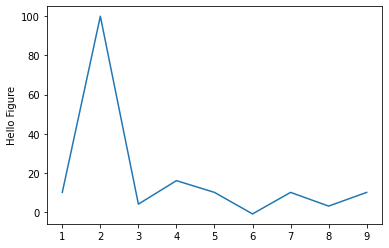

In [62]:
import matplotlib.pyplot as plt
plt.plot(t['a'], t['b'])
plt.ylabel('Hello Figure')
plt.show()

### But what do I do if I'm about to run out of memory?

You wont. Every tablite table is backed by HDF5 on disk. The memory footprint of a table is only the metadata required to know the relationships between variable names and the datastructures.

Let's do a comparison:

In [63]:
# Let's monitor the memory and record the observations into a table!
import psutil, os, gc
from time import process_time, sleep
process = psutil.Process(os.getpid())
baseline_memory = process.memory_info().rss

digits = 1_000_000

records = Table()
records.add_column('method')
records.add_column('memory')
records.add_column('time')

# Let's now use the common and convenient "row" based format:


In [64]:

start = process_time()
L = []
for _ in range(digits):
    L.append(tuple([11 for _ in range(10)]))
end = process_time()
# go and check taskmanagers memory usage.
# At this point we're using ~154.2 Mb to store 1 million lists with 10 items.
records.add_rows(('1e6 lists w. 10 integers', process.memory_info().rss - baseline_memory, round(end-start,4)))

L.clear()
gc.collect()
sleep(1)


In [65]:

# Let's now use a columnar format instead:
start = process_time()
L = [[11 for i in range(digits)] for _ in range(10)]
end = process_time()

# go and check taskmanagers memory usage.
# at this point we're using ~98.2 Mb to store 10 lists with 1 million items.
records.add_rows(('10 lists with 1e6 integers', process.memory_info().rss - baseline_memory, round(end-start,4)))
L.clear()
gc.collect()
sleep(1)


In [66]:

# We've thereby saved 50 Mb by avoiding the overhead from managing 1 million lists.

# Q: But why didn't I just use an array? It would have even lower memory footprint.
# A: First, array's don't handle None's and we get that frequently in dirty csv data.
# Second, Table needs even less memory.

# Let's start with an array:

import array
start = process_time()
L = [array.array('i', [11 for _ in range(digits)]) for _ in range(10)]
end = process_time()
# go and check taskmanagers memory usage.
# at this point we're using 60.0 Mb to store 10 lists with 1 million integers.

records.add_rows(('10 lists with 1e6 integers in arrays', process.memory_info().rss - baseline_memory, round(end-start,4)))
L.clear()
gc.collect()
sleep(1)


In [67]:

# Now let's use Table:

start = process_time()
t = Table()
for i in range(10):
    t.add_column(str(i), data=[11 for _ in range(digits)])
end = process_time()

records.add_rows(('Table with 10 columns with 1e6 integers', process.memory_info().rss - baseline_memory, round(end-start,4)))

start = process_time()
t2 = t.copy()
end = process_time()

records.add_rows(('2 Tables with 10 columns with 1e6 integers each', process.memory_info().rss - baseline_memory, round(end-start,4)))

# go and check taskmanagers memory usage.
# At this point we're using  24.5 Mb to store 10 columns with 1 million integers.
# Only the metadata remains in pythons memory.


 Finally let's look at all the results:

In [68]:

records.show()

+===+===============================================+=========+======+
| # |                     method                    |  memory | time |
|row|                      str                      |   int   |float |
+---+-----------------------------------------------+---------+------+
|0  |1e6 lists w. 10 integers                       |139595776|0.5625|
|1  |10 lists with 1e6 integers                     | 83795968|0.3281|
|2  |10 lists with 1e6 integers in arrays           | 43433984|0.4375|
|3  |Table with 10 columns with 1e6 integers        |  3424256|1.3906|
|4  |2 Tables with 10 columns with 1e6 integers each|  3420160|0.0625|
+===+===============================================+=========+======+


*Conclusion*: A drop from 140 Mb to 3.5 Mb working memory using tablite Tables.




### Conclusions

This concludes the mega-tutorial to `tablite`. There's nothing more to it.
But oh boy it'll save a lot of time.

Here's a summary of features:

- Everything a list can do, plus data type checking.
- import csv*, tsv, txt, xls, xlsx, xlsm, ods, zip and log using `Table.from_file(...)`
- import multiple files use `file_reader`.
- Move fluently between disk and ram using `t.use_disk = True/False`
- Iterate over rows or columns
- Create multikey index, sort, use filter, any and all to select.
  Lookup between tables using custom functions.
- Perform multikey joins with other tables.
- Perform groupby and reorganise data as a pivot table with max, min, sum, first, last, count, unique, average, st.deviation, median and mode
- Update tables with `+=` which automatically sorts out the columns - even if they're not in perfect order.
- Calculate out-of-memory summaries using `+=` on `groupby`, f.x. `groupby += t1`
  
